In [73]:
import pandas as pd
import os
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
POSTGRES_USER='aalonso'
POSTGRES_PASS='ITBA'
POSTGRES_HOST="localhost"
POSTGRES_DB='database_pizza'
POSTGRES_PORT='5432'
POSTGRES_SCHEMA='schema_pizza'

In [75]:
str_conection=f"postgresql://{POSTGRES_USER}:{POSTGRES_PASS}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"

In [76]:
engine=create_engine(str_conection,
connect_args={'options': f'-csearch_path={POSTGRES_SCHEMA}'})

In [77]:
conn = engine.connect()

1- ¿Cual es la facturacion mensual y anual?

In [78]:
query_1="""select o2.year,o2.month, round(sum(o.quantity*p.price)) as total_order_amount 
from schema_pizza.order_details o
inner join schema_pizza.orders o2 on o.order_id=o2.order_id
left join schema_pizza.pizzas p on p.pizza_id=o.pizza_id
group by o2.year,o2.month
order by o2.year,o2.month;
"""

In [79]:
df_year_month=pd.read_sql(query_1,conn)

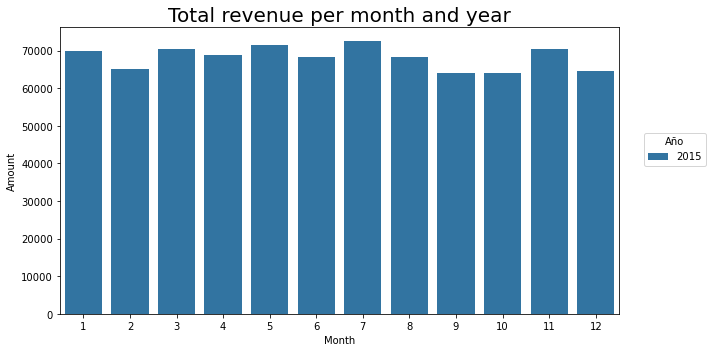

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_year_month,x=df_year_month['month'],
            y='total_order_amount',
            #color='blue',
            hue='year',
            )
plt.title('Total revenue per month and year',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend(loc=8, bbox_to_anchor=(1.1, 0.5),title="Año")
plt.tight_layout()
plt.savefig(r'\\wsl$\Ubuntu\home\ariel\TP-Foundations\Reports\graphs\revenue_month_year.jpg',dpi=300)

2- ¿Qué pizza es la que genera mayor ingreso y ventas?

In [81]:
query_2_amount="""select  pt.name,sum(o.quantity) as total_oders,round(sum(o.quantity*p.price),2) as total_order_amount
from schema_pizza.order_details o
inner join schema_pizza.orders o2 on o.order_id=o2.order_id
left join schema_pizza.pizzas p on p.pizza_id=o.pizza_id
left join schema_pizza.pizza_types pt on pt.pizza_type_id=p.pizza_type_id 
group by pt.name
order by total_order_amount DESC;"""

In [82]:
query_2_sales="""select  pt.name,sum(o.quantity) as total_orders,round(sum(o.quantity*p.price),2) as total_order_amount
from schema_pizza.order_details o
inner join schema_pizza.orders o2 on o.order_id=o2.order_id
left join schema_pizza.pizzas p on p.pizza_id=o.pizza_id
left join schema_pizza.pizza_types pt on pt.pizza_type_id=p.pizza_type_id 
group by pt.name
order by total_orders DESC;"""

In [83]:
df_pizza_revenue=pd.read_sql(query_2_amount,conn)

In [84]:
df_pizza_revenue.head(10)

,name,total_oders,total_order_amount
0,The Thai Chicken Pizza,2371,43434.25
1,The Barbecue Chicken Pizza,2432,42768.00
2,The California Chicken Pizza,2370,41409.50
3,The Classic Deluxe Pizza,2453,38180.50
4,The Spicy Italian Pizza,1924,34831.25
5,The Southwest Chicken Pizza,1917,34705.75
6,The Italian Supreme Pizza,1884,33476.75
7,The Hawaiian Pizza,2422,32273.25
8,The Four Cheese Pizza,1902,32265.70
9,The Sicilian Pizza,1938,30940.50


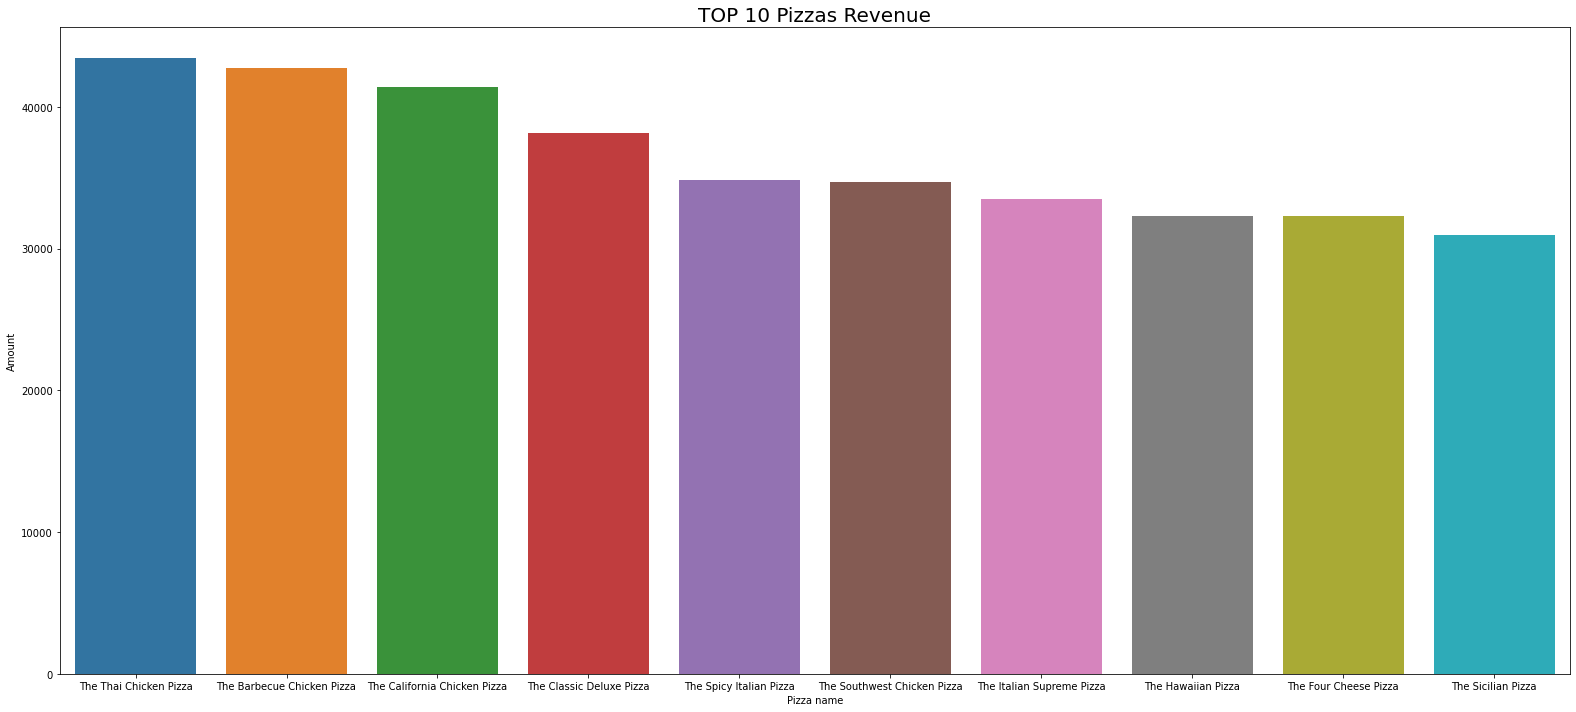

In [105]:
plt.figure(figsize=(22,10))
fig=sns.barplot(data=df_pizza_revenue.head(10),
            x=df_pizza_revenue.head(10)['name'],
            y='total_order_amount',
            #color='blue',
            #hue='year',
            )
plt.title('TOP 10 Pizzas Revenue',fontsize=20)
plt.xlabel('Pizza name')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig(r'\\wsl$\Ubuntu\home\ariel\TP-Foundations\Reports\graphs\revenue_pizza.jpg',dpi=300)

In [86]:
df_pizza_sales=pd.read_sql(query_2_sales,conn)

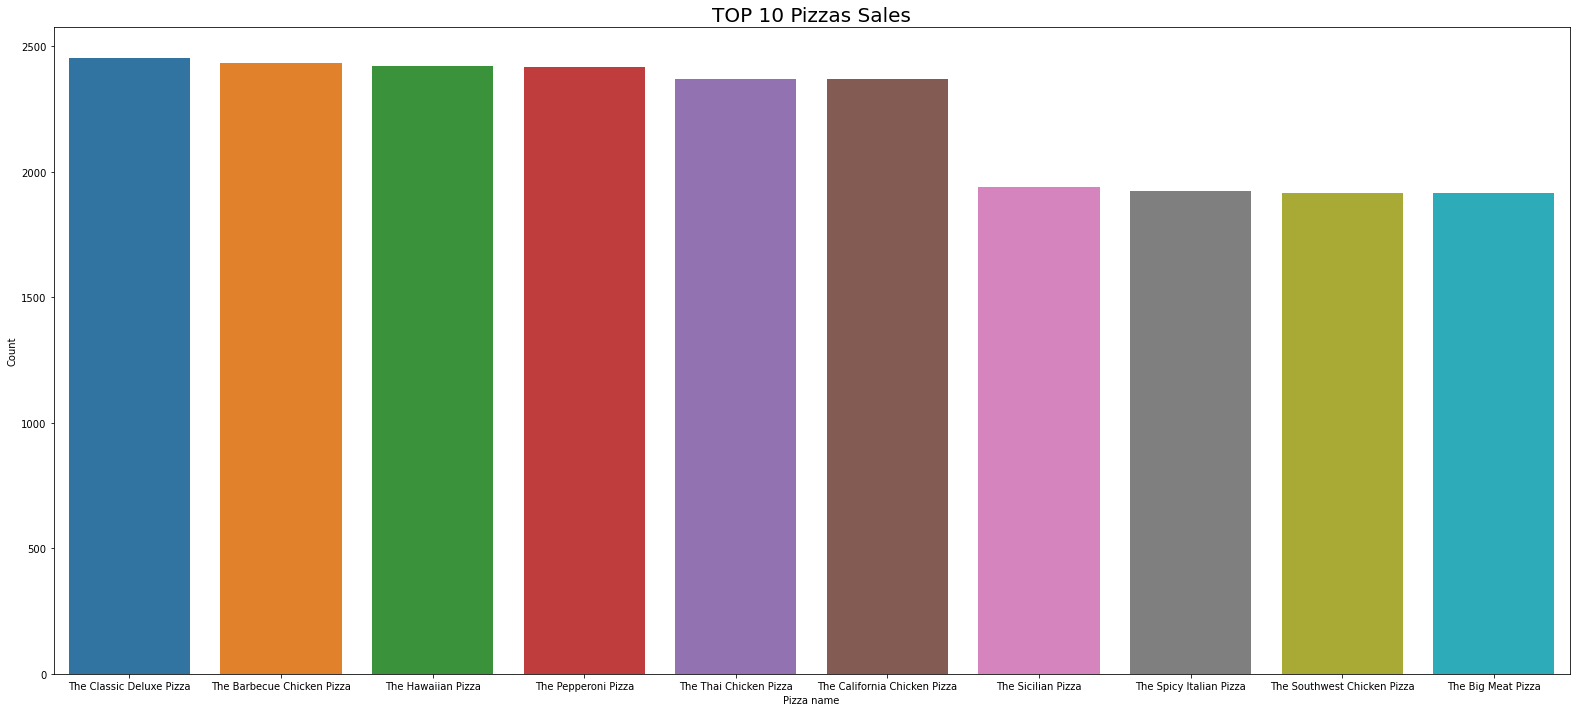

In [104]:
plt.figure(figsize=(22,10))
fig=sns.barplot(data=df_pizza_sales.head(10),
            x=df_pizza_sales.head(10)['name'],
            y='total_orders',
            #color='blue',
            #hue='year',
            )
plt.title('TOP 10 Pizzas Sales',fontsize=20)
plt.xlabel('Pizza name')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.savefig(r'\\wsl$\Ubuntu\home\ariel\TP-Foundations\Reports\graphs\sales_pizza.jpg',dpi=300)

3- ¿Qué categoria es la que genera mayor ingreso y ventas?


In [109]:
query_3_revenue="""select pt.category ,sum(o.quantity) as total_orders,round(sum(o.quantity*p.price),2) as total_order_amount 
from schema_pizza.order_details o
inner join schema_pizza.orders o2 on o.order_id=o2.order_id
left join schema_pizza.pizzas p on p.pizza_id=o.pizza_id
left join schema_pizza.pizza_types pt on pt.pizza_type_id=p.pizza_type_id 
group by pt.category
order by total_order_amount DESC"""

In [117]:
query_3_sales="""select pt.category ,sum(o.quantity) as total_orders,round(sum(o.quantity*p.price),2) as total_order_amount 
from schema_pizza.order_details o
inner join schema_pizza.orders o2 on o.order_id=o2.order_id
left join schema_pizza.pizzas p on p.pizza_id=o.pizza_id
left join schema_pizza.pizza_types pt on pt.pizza_type_id=p.pizza_type_id 
group by pt.category
order by total_orders DESC"""

In [111]:
df_category_revenue=pd.read_sql(query_3_revenue,conn)

In [112]:
df_category_revenue.head(1)

,category,total_orders,total_order_amount
0,Classic,14888,220053.1


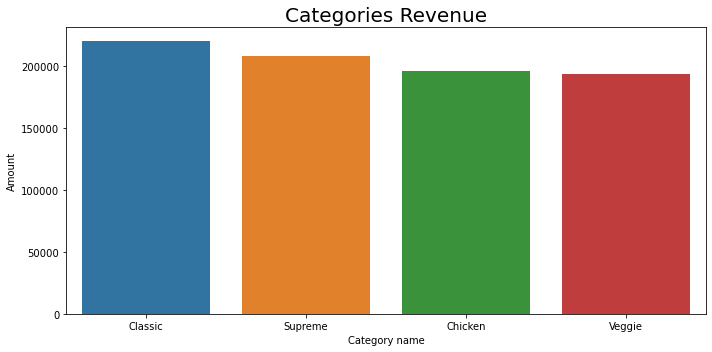

In [115]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=df_category_revenue.head(10),
            x=df_category_revenue.head(10)['category'],
            y='total_order_amount',
            #color='blue',
            #hue='year',
            )
plt.title('Categories Revenue',fontsize=20)
plt.xlabel('Category name')
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig(r'\\wsl$\Ubuntu\home\ariel\TP-Foundations\Reports\graphs\revenue_category.jpg',dpi=300)

In [118]:
df_category_sales=pd.read_sql(query_3_sales,conn)

In [120]:
df_category_sales.head(2)

,category,total_orders,total_order_amount
0,Classic,14888,220053.1
1,Supreme,11987,208197.0


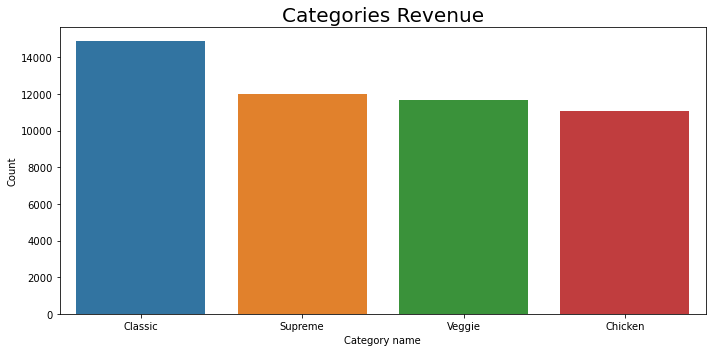

In [121]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=df_category_sales.head(10),
            x=df_category_sales.head(10)['category'],
            y='total_orders',
            #color='blue',
            #hue='year',
            )
plt.title('Categories Revenue',fontsize=20)
plt.xlabel('Category name')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.savefig(r'\\wsl$\Ubuntu\home\ariel\TP-Foundations\Reports\graphs\sales_category.jpg',dpi=300)

4- ¿Cual dia de la semana y hora se venden mayor cantidad de pizzas?

In [139]:
query_4_day_of_week="""select  case when day_of_week=1 then 'Sunday'
		when day_of_week=2 then 'Monday' 
		when day_of_week=3 then 'Tuesday' 
		when day_of_week=4 then 'Wednesday'
		when day_of_week=5 then 'Thursday'
		when day_of_week=6 then 'Friday'
		when day_of_week=7 then 'Saturday'
		end as day_name,
		day_of_week,
		sum(o.quantity) as total_orders,
		round(sum(o.quantity*p.price),2) as total_order_amount,
		round(avg(o.quantity*p.price),2) as mean_order_amount
from schema_pizza.order_details o
inner join schema_pizza.orders o2 on o.order_id=o2.order_id
left join schema_pizza.pizzas p on p.pizza_id=o.pizza_id
left join schema_pizza.pizza_types t on p.pizza_type_id=t.pizza_type_id
group by day_of_week
order by total_orders DESC ;"""

In [146]:
df_sales_day_of_week=pd.read_sql(query_4_day_of_week,conn)

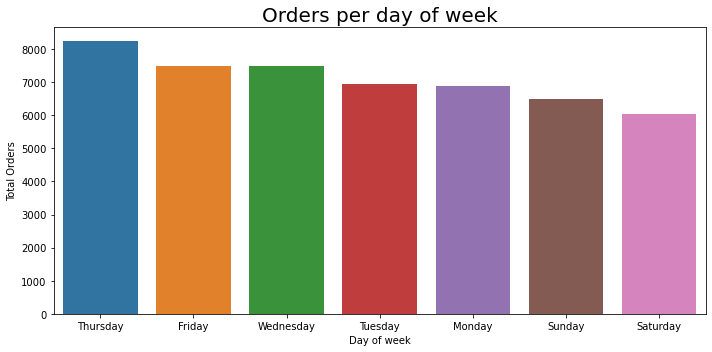

In [147]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=df_sales_day_of_week,
            x=df_sales_day_of_week['day_name'],
            y='total_orders',
            #color='blue',
            #hue='year',
            )
plt.title('Orders per day of week',fontsize=20)
plt.xlabel('Day of week')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.savefig(r'\\wsl$\Ubuntu\home\ariel\TP-Foundations\Reports\graphs\sales_day_of_week.jpg',dpi=300)

In [151]:
query_4_hour="""select  hour,sum(o.quantity) as total_orders,
round(sum(o.quantity*p.price),2) as total_order_amount,
round(avg(o.quantity*p.price),2) as mean_order_amount
from schema_pizza.order_details o
inner join schema_pizza.orders o2 on o.order_id=o2.order_id
left join schema_pizza.pizzas p on p.pizza_id=o.pizza_id
left join schema_pizza.pizza_types t on p.pizza_type_id=t.pizza_type_id
group by hour
order by total_orders DESC ;"""

In [152]:
df_sales_hour=pd.read_sql(query_4_hour,conn)

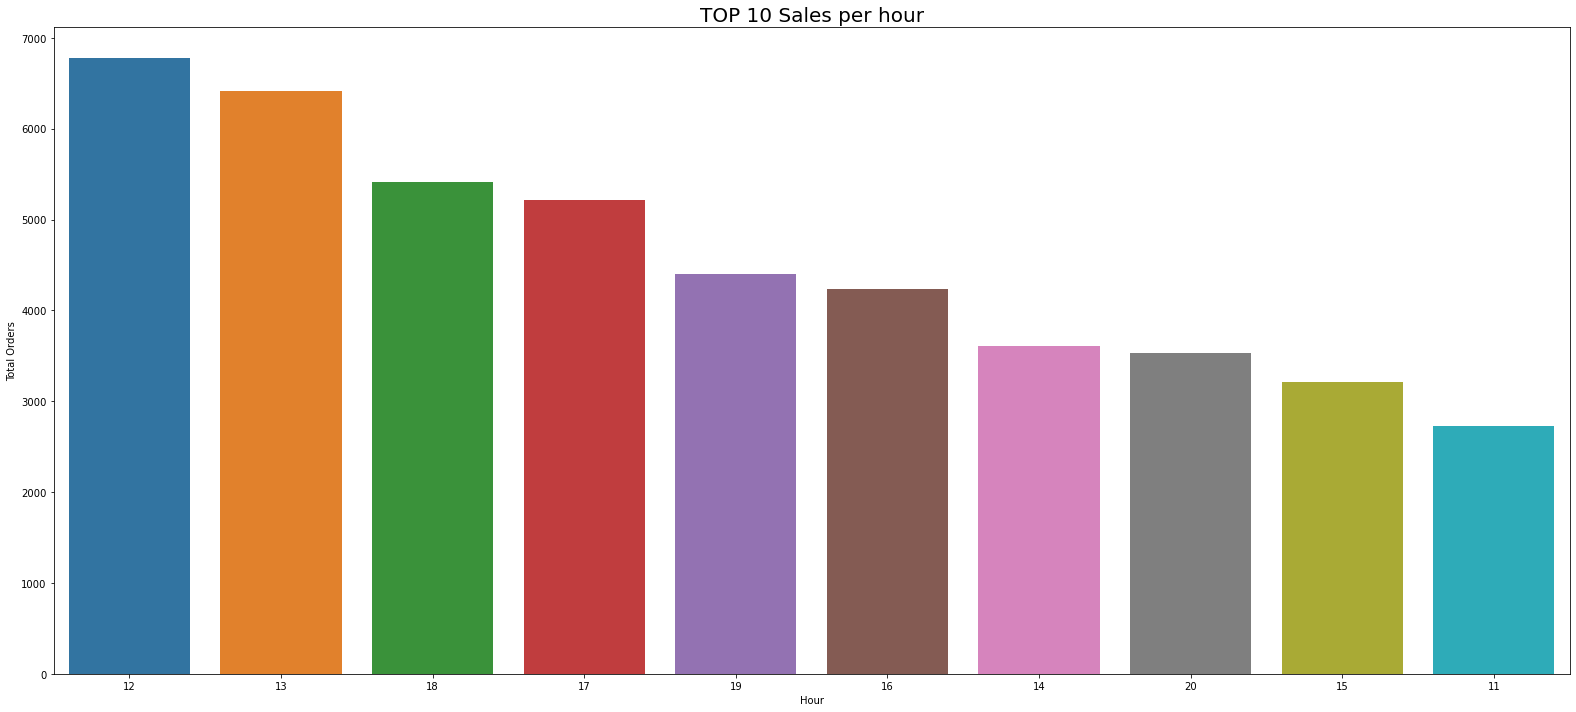

In [162]:
plt.figure(figsize=(22,10))
fig=sns.barplot(data=df_sales_hour.head(10),
            x=df_sales_hour.head(10)['hour'].astype('str'),
            y='total_orders',
            #color='blue',
            #hue='year',
            )
plt.title('TOP 10 Sales per hour',fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.savefig(r'\\wsl$\Ubuntu\home\ariel\TP-Foundations\Reports\graphs\sales_hour.jpg',dpi=300)

In [163]:
conn.close()

In [217]:
#print reports before generating the plots
print("While the graphs are generated, we will show some brief data")
#highest month
print("\nThe month with the highest revenue was:",
    '\tYear:',
    df_year_month.loc[df_year_month['total_order_amount']==df_year_month['total_order_amount'].max(),:]['year'].values[0],
    "\tMonth:",
    df_year_month.loc[df_year_month['total_order_amount']==df_year_month['total_order_amount'].max(),:]['month'].values[0],
    "\tRevenue:",
    df_year_month.loc[df_year_month['total_order_amount']==df_year_month['total_order_amount'].max(),:]['total_order_amount'].values[0]
    )
print("\nThe pizza with the highest revenue is:",
    df_pizza_revenue.loc[df_pizza_revenue['total_order_amount']==df_pizza_revenue['total_order_amount'].max(),:]['name'].values[0],
    "\tRevenue:",
    df_pizza_revenue.loc[df_pizza_revenue['total_order_amount']==df_pizza_revenue['total_order_amount'].max(),:]['total_order_amount'].values[0]
)
print("\nThe pizza with the most sales is:",
    df_pizza_sales.loc[df_pizza_sales['total_orders']==df_pizza_sales['total_orders'].max(),:]['name'].values[0],
    "\tOrders:",
    df_pizza_sales.loc[df_pizza_sales['total_orders']==df_pizza_sales['total_orders'].max(),:]['total_orders'].values[0]
)
print("\nThe category with the highest revenue is:",
    df_category_revenue.loc[df_category_revenue['total_order_amount']==df_category_revenue['total_order_amount'].max(),:]['category'].values[0],
    "\tRevenue:",
    df_category_revenue.loc[df_category_revenue['total_order_amount']==df_category_revenue['total_order_amount'].max(),:]['total_order_amount'].values[0]
)
print("\nThe category with the most sales is:",
    df_category_sales.loc[df_category_sales['total_orders']==df_category_sales['total_orders'].max(),:]['category'].values[0],
    "\t Orders:",
    df_category_sales.loc[df_category_sales['total_orders']==df_category_sales['total_orders'].max(),:]['total_orders'].values[0]
)

While the graphs are generated, we will show some brief data

The month with the highest revenue was: 	Year: 2015 	Month: 7 	Revenue: 72558.0

The pizza with the highest revenue is: The Thai Chicken Pizza 	Revenue: 43434.25

The pizza with the most sales is: The Classic Deluxe Pizza 	Orders: 2453

The category with the highest revenue is: Classic 	Revenue: 220053.1

The category with the most sales is: Classic 	 Orders: 14888


In [220]:
print("\nThe day of week with the most sales is:",
    df_sales_day_of_week.loc[df_sales_day_of_week['total_orders']==df_sales_day_of_week['total_orders'].max(),:]['day_name'].values[0],
    "\t Orders:",
    df_sales_day_of_week.loc[df_sales_day_of_week['total_orders']==df_sales_day_of_week['total_orders'].max(),:]['total_orders'].values[0]
)


The day of week with the most sales is: Thursday 	 Orders: 8242


In [222]:
print("\nThe hour with the most sales is:",
    df_sales_hour.loc[df_sales_hour['total_orders']==df_sales_hour['total_orders'].max(),:]['hour'].values[0],
    "\t Orders:",
    df_sales_hour.loc[df_sales_hour['total_orders']==df_sales_hour['total_orders'].max(),:]['total_orders'].values[0]
)


The hour with the most sales is: 12 	 Orders: 6776
